## Chapter 2

### Introduction to Interpretability in Machine Learning
#### Here we will look at some of the Inherently Interpretable model

##### In this example of a Decision Tree model, we will look at the inherent element of the trained model in augmenting our understanding of its internal process

**Supervised Learning - Decision Tree**

We use the diabetes dataset from sklearn. <br>

This is a Classification problem and we will use a Decision Tree model to classify and understand the model's internals.<br>


We are using the sklearn diabetes datasets. More details on the dataset can be found here <br>
 https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset




|**age**|age in years|
|-------|------------|
|**sex**|gender|
|**bmi**|body mass index|
|**bp** | average blood pressure |
| **s1** | tc, total serum cholesterol |
| **s2**  | ldl, low-density lipoproteins |
| **s3**  | hdl, high-density lipoproteins |
| **s4** | tch, total cholesterol / HDL |
| **s5** | ltg, possibly log of serum triglycerides level |
| **s6** | glu, blood sugar level |

**Import all the relevant libraries**

In [1]:
# Import the necessary libraries
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


**Load the diabetes dataset**

Since this dataset has a continous value as its label (or target) we convert it into a classification label by computing the median value and using that as a measure to determine boundaries for two classes.

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']],
                  columns=diabetes['feature_names'] + ['target'])

# Convert the target variable into a binary variable
median_value = df['target'].median()
df['target'] = (df['target'] >= median_value).astype(int)


**Split the dataset for training & testing.**

The target (or label) is dropped from the features provided for trainig.

In [13]:
# Train-test split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train the Decision Tree Calssifier model on the training dataset.**

In [14]:
# Train the model
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

**The trained model is used to predict the class for the test dataset. Accuracy is measured for the prediction with respect to the actual values**


In [15]:
# Make predictions on the test set
y_pred = decisiontree.predict(X_test)

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the accuracy metrics
print("Accuracy:", np.round(accuracy,3))
print("Confusion Matrix:\n", cm)

Accuracy: 0.685
Confusion Matrix:
 [[36 13]
 [15 25]]


The value of accuarcy can vary slightly accross model runs and should be used as an indicative value. 

**Plot the Computed Decision Tree visual used in the model**

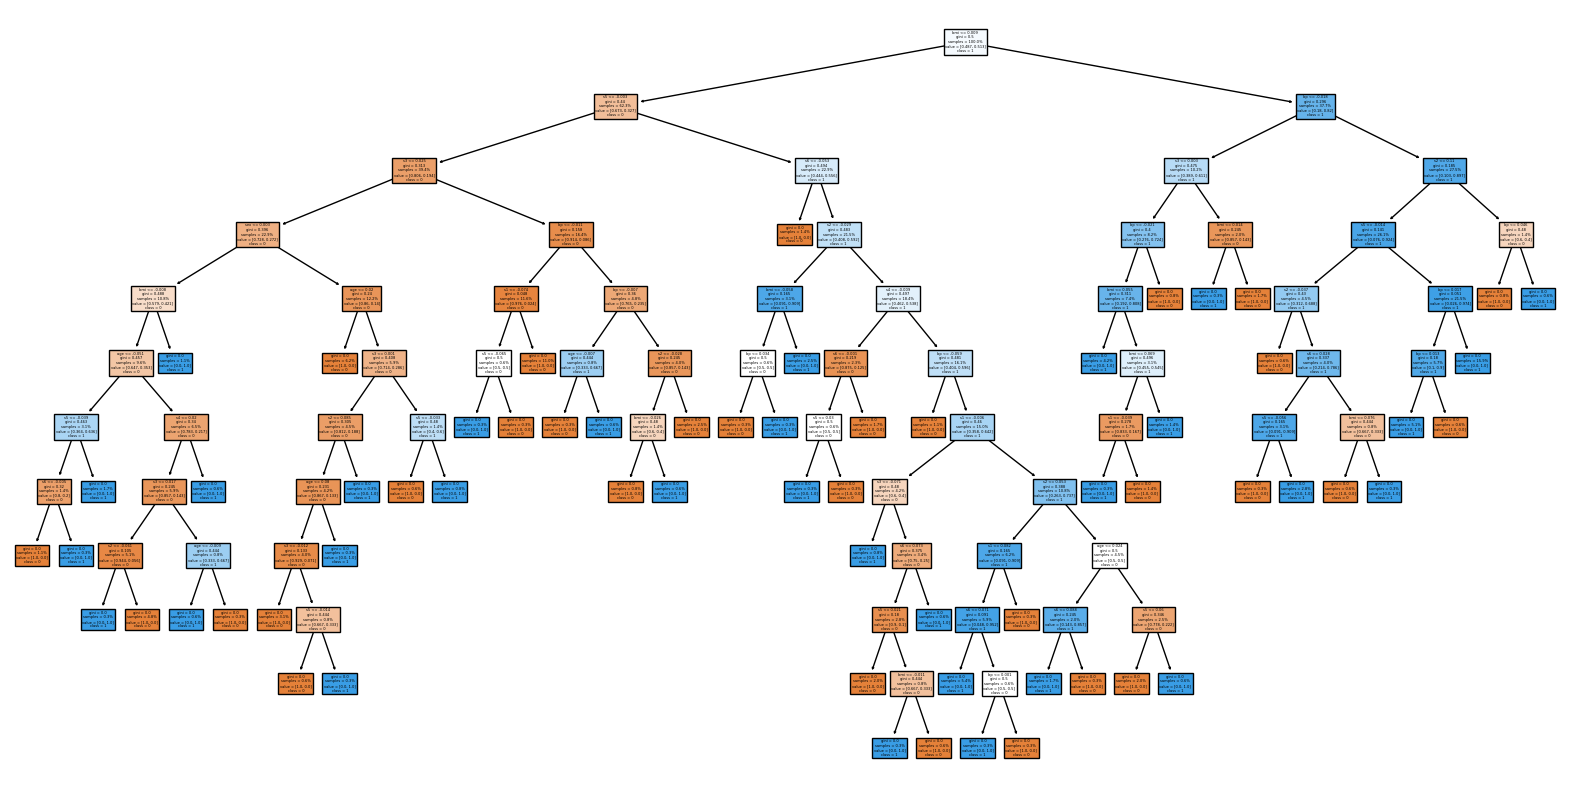

In [16]:

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(decisiontree, filled=True, feature_names=X.columns.tolist(), class_names=['0', '1'], proportion=True)
plt.show()

**Plot a closeup of two levels for better readability**

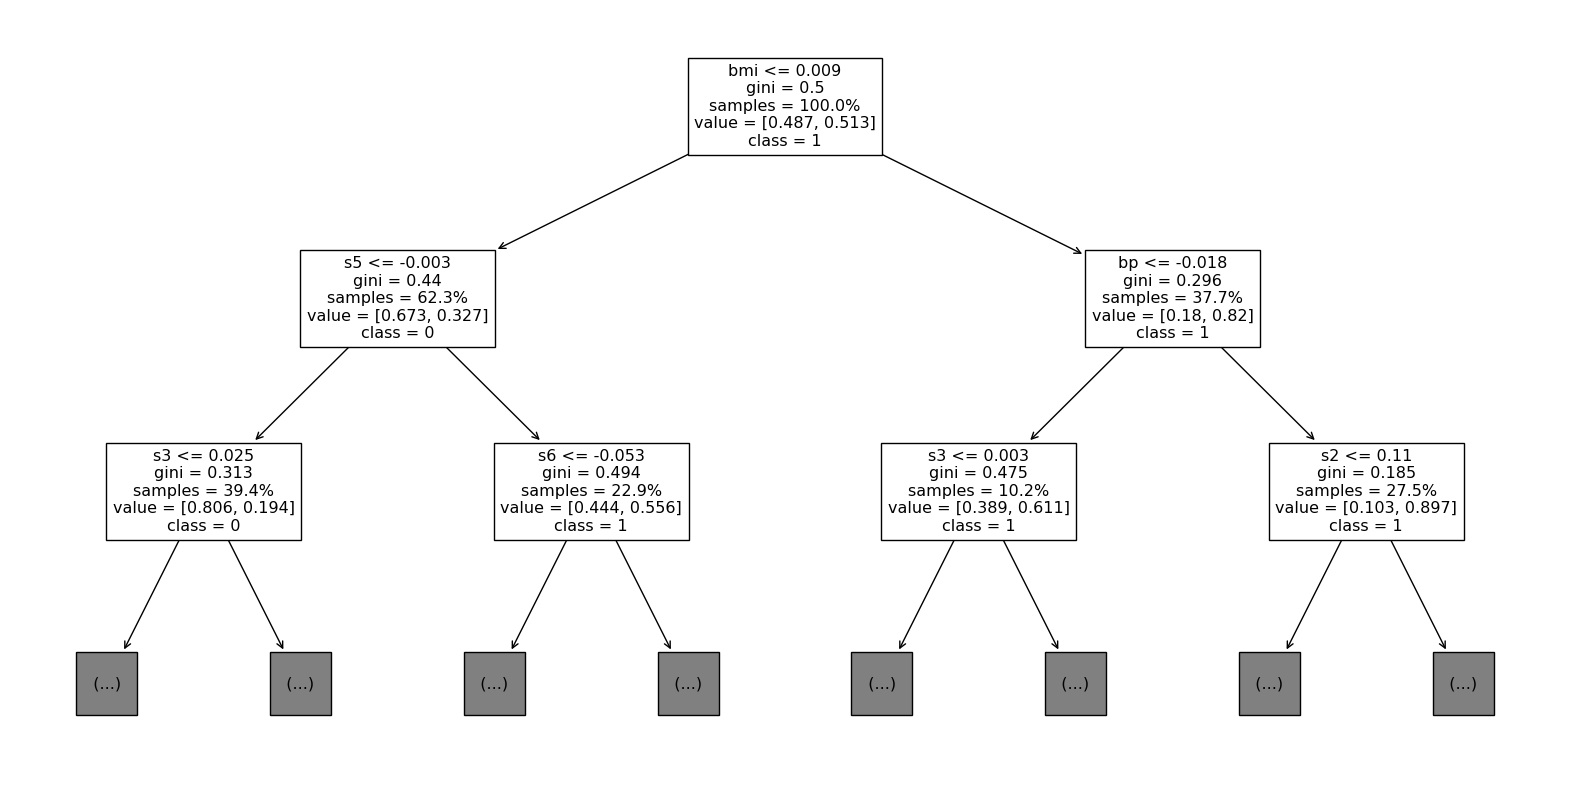

In [17]:

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(decisiontree, max_depth= 2, feature_names=X.columns.tolist(), class_names=['0', '1'], proportion=True)
plt.show()

The above tree provides an understanding of the decision path used to arrive at a specific classification.

**Using the feature_importance, list out features identified as important in the tree.**

In [18]:
# Print the feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": decisiontree.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print(feature_importance)

  Feature  Importance
2     bmi    0.324180
8      s5    0.170917
3      bp    0.122341
5      s2    0.083766
6      s3    0.071293
9      s6    0.070988
0     age    0.066997
4      s1    0.038495
7      s4    0.032896
1     sex    0.018128


**Set a new series with feature names. This is used in the next plot**

In [21]:
feature_names = diabetes['feature_names']
importance = decisiontree.feature_importances_
tree_importances = pd.Series(importance, index=feature_names)

print(feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


**Plot the bar plot of the feature importance**

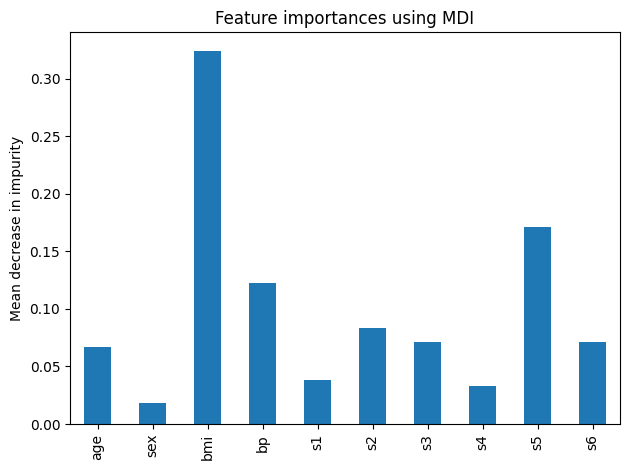

In [23]:
fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The importance of a feature is also known as the Gini importance. Gini importance measures the influence or importance it is in making decisions. We notice the parallels in the tree visual above - this is because the decision tree is built using the gini index (or entropy).

**Use permutation importance to get the features influencing the outputs**

In [24]:
from sklearn.inspection import permutation_importance


result = permutation_importance(
    decisiontree, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)


DT_importances = pd.Series(result.importances_mean, index=X.columns)
print(DT_importances)

age    0.020225
sex    0.031461
bmi    0.025843
bp     0.015730
s1    -0.016854
s2     0.003371
s3     0.026966
s4     0.013483
s5     0.074157
s6    -0.021348
dtype: float64


**Plot the Permutation Feature importance for the Decision Tree Model**

Standard deviation for each feature is also plotted as a reference.

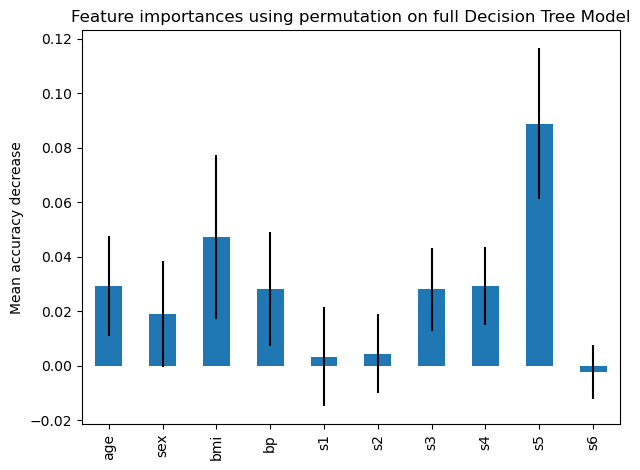

In [40]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
DT_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full Decision Tree Model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Permutation technique is particularly useful for non-linear models or estimators. It involves randomly shuffling the values of a single feature and observing the resulting degradation of the model’s score. We discuss permutation methods in future chapters.

More details on this particular implemenation can be found on the sklearn documentation.
https://scikit-learn.org/stable/modules/permutation_importance.html

